# Variance vs Bias 
https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/

### Evaluating your Machine Learning Model
The primary aim of the Machine Learning model is to learn from the given data and generate predictions based on the pattern observed during the learning process. However, our task doesn’t end there. We need to continuously make improvements to the models, based on the kind of results it generates. We also quantify the model’s performance using metrics like Accuracy, Mean Squared Error(MSE), F1-Score, etc and try to improve these metrics. This can often get tricky when we have to maintain the flexibility of the model without compromising on its correctness.

A supervised Machine Learning model aims to train itself on the input variables(X) in such a way that the predicted values(Y) are as close to the actual values as possible. This difference between the actual values and predicted values is the error and it is used to evaluate the model. The error for any supervised Machine Learning algorithm comprises of 3 parts:

Bias error
Variance error
The noise
While the noise is the irreducible error that we cannot eliminate, the other two i.e. Bias and Variance are reducible errors that we can attempt to minimize as much as possible.

In the following sections, we will cover the Bias error, Variance error, and the Bias-Variance tradeoff which will aid us in the best model selection. And what’s exciting is that we will cover some techniques to deal with these errors by using an example dataset.

we have taken up the Pima Indians Diabetes dataset and formed a classification problem on it. Let’s start by gauging the dataset and observe the kind of data we are dealing with. We will do this by importing the necessary libraries:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

Now, we will load the data into a data frame and observe some rows to get insights into the data.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/purva91/Bias_Variance_Knn/master/diabetes.csv')


In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


We need to predict the ‘Outcome’ column. Let us separate it and assign it to a target variable ‘y’. The rest of the data frame will be the set of input variables X

In [4]:
y = df['Outcome'].values
X = df.drop(['Outcome'], axis=1)

Now let’s scale the predictor variables and then separate the training and the testing data

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df = ss.fit_transform(df)

# divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  # 70% training and 30% test

Since the outcomes are classified in a binary form, we will use the simplest K-nearest neighbor classifier(Knn) to classify whether the patient has diabetes or not.

However, how do we decide the value of ‘k’?

Maybe we should use k = 1 so that we will get very good results on our training data? That might work, but we cannot guarantee that the model will perform just as well on our testing data since it can get too specific
How about using a high value of k, say like k = 100 so that we can consider a large number of nearest points to account for the distant points as well? However, this kind of model will be too generic and we cannot be sure if it has considered all the possible contributing features correctly.
Let us take a few possible values of k and fit the model on the training data for all those values. We will also compute the training score and testing score for all those values.

In [6]:
train_score = []
test_score = []
k_vals = []

for k in range(1,21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)

    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)

    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

To derive more insights from this, let us plot the training data(in red) and the testing data(in blue).

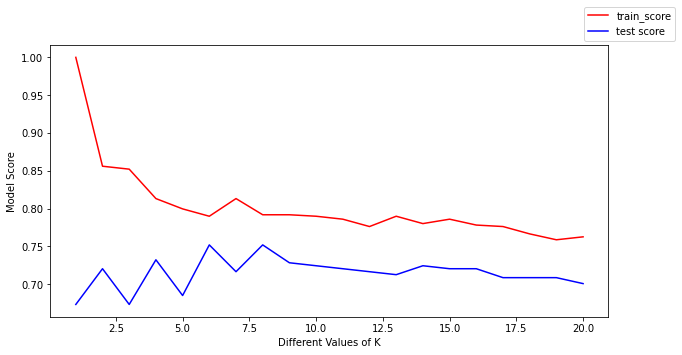

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model Score')
plt.plot(k_vals, train_score, color = 'r', label = 'train_score')
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1,1), bbox_transform = plt.gcf().transFigure)
plt.show()



To calculate the scores for a particular value of k,

In [8]:
knn = KNeighborsClassifier(n_neighbors= 5)

# fit model
knn.fit(X_train, y_train)

# get score
knn.score(X_test, y_test)

0.6850393700787402

We can make the following conclusions from the above plot:

For low values of k, the training score is high, while the testing score is low
As the value of k increases, the testing score starts to increase and the training score starts to decrease.
However, at some value of k, both the training score and the testing score are close to each other.
This is where Bias and Variance come into the picture.

### What is Bias?
In the simplest terms, Bias is the difference between the Predicted Value and the Expected Value. To explain further, the model makes certain assumptions when it trains on the data provided. When it is introduced to the testing/validation data, these assumptions may not always be correct.

In our model, if we use a large number of nearest neighbors, the model can totally decide that some parameters are not important at all.  For example, it can just consider that the Glusoce level and the Blood Pressure decide if the patient has diabetes. This model would make very strong assumptions about the other parameters not affecting the outcome. You can also think of it as a model predicting a simple relationship when the datapoints clearly indicate a more complex relationship:

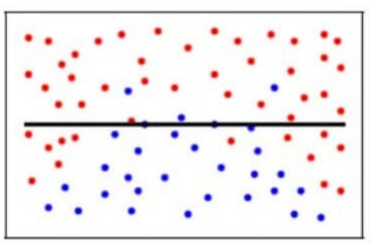

Mathematically, let the input variables be X and a target variable Y. We map the relationship between the two using a function f.

Therefore,

Y = f(X) + e

Here ‘e’ is the error that is normally distributed. The aim of our model f'(x) is to predict values as close to f(x) as possible. Here, the Bias of the model is:

Bias[f'(X)] = E[f'(X) – f(X)]

As I explained above, when the model makes the generalizations i.e. when there is a high bias error, it results in a very simplistic model that does not consider the variations very well. Since it does not learn the training data very well, it is called Underfitting.

### What is a Variance?
Contrary to bias, the Variance is when the model takes into account the fluctuations in the data i.e. the noise as well. So, what happens when our model has a high variance?

The model will still consider the variance as something to learn from. That is, the model learns too much from the training data, so much so, that when confronted with new (testing) data, it is unable to predict accurately based on it.

Mathematically, the variance error in the model is:

Variance[f(x))=E[X^2]−E[X]^2

Since in the case of high variance, the model learns too much from the training data, it is called overfitting.

In the context of our data, if we use very few nearest neighbors, it is like saying that if the number of pregnancies is more than 3, the glucose level is more than 78, Diastolic BP is less than 98, Skin thickness is less than 23 mm and so on for every feature….. decide that the patient has diabetes. All the other patients who don’t meet the above criteria are not diabetic. While this may be true for one particular patient in the training set, what if these parameters are the outliers or were even recorded incorrectly? Clearly, such a model could prove to be very costly!

Additionally, this model would have a high variance error because the predictions of the patient being diabetic or not vary greatly with the kind of training data we are providing it. So even changing the Glucose Level to 75 would result in the model predicting that the patient does not have diabetes.

To make it simpler, the model predicts very complex relationships between the outcome and the input features when a quadratic equation would have sufficed. This is how a classification model would look like when there is a high variance error/when there is overfitting:



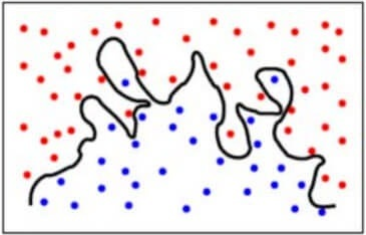

To summarise,

A model with a high bias error underfits data and makes very simplistic assumptions on it
A model with a high variance error overfits the data and learns too much from it
A good model is where both Bias and Variance errors are balanced

### Bias-Variance Tradeoff
How do we relate the above concepts to our Knn model from earlier? Let’s find out!

In our model, say, for, k = 1, the point closest to the datapoint in question will be considered. Here, the prediction might be accurate for that particular data point so the bias error will be less.

However, the variance error will be high since only the one nearest point is considered and this doesn’t take into account the other possible points. What scenario do you think this corresponds to? Yes, you are thinking right, this means that our model is overfitting.

On the other hand, for higher values of k, many more points closer to the datapoint in question will be considered. This would result in higher bias error  and underfitting since many points closer to the datapoint are considered and thus it can’t learn the specifics from the training set. However, we can account for a lower variance error for the testing set which has unknown values.

To achieve a balance between the Bias error and the Variance error, we need a value of k such that the model neither learns from the noise (overfit on data) nor makes sweeping assumptions on the data(underfit on data). To keep it simpler, a balanced model would look like this:

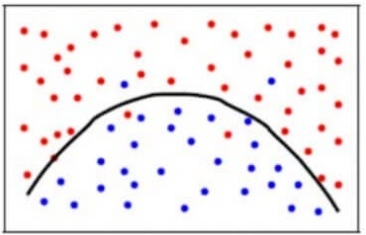

Though some points are classified incorrectly, the model generally fits most of the datapoints accurately. The balance between the Bias error and the Variance error is the Bias-Variance Tradeoff.

The following bulls-eye diagram explains the tradeoff better:



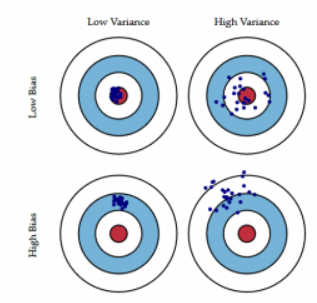

The center i.e. the bull’s eye is the model result we want to achieve that perfectly predicts all the values correctly. As we move away from the bull’s eye, our model starts to make more and more wrong predictions.

A model with low bias and high variance predicts points that are around the center generally, but pretty far away from each other. A model with high bias and low variance is pretty far away from the bull’s eye, but since the variance is low, the predicted points are closer to each other.

In terms of model complexity, we can use the following diagram to decide on the optimal complexity of our model.

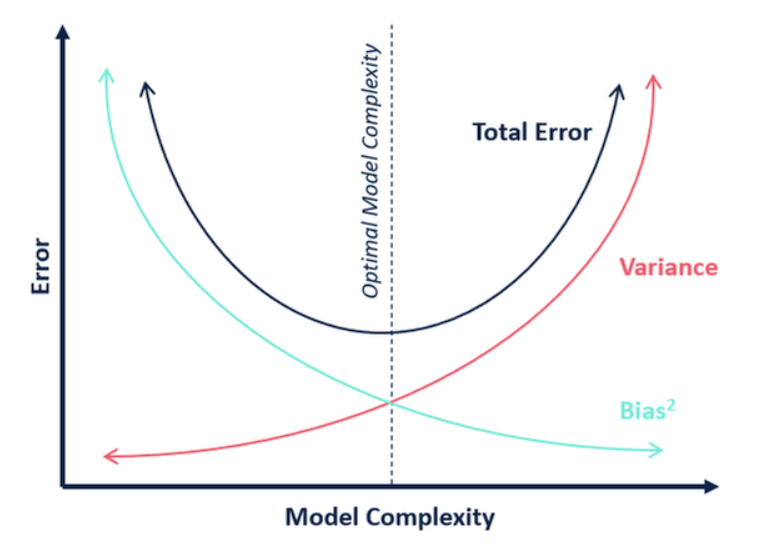

So, what do you think is the optimum value for k?

From the above explanation, we can conclude that the k for which

the testing score is the highest, and
both the test score and the training score are close to each other
is the optimal value of k. So, even though we are compromising on a lower training score, we still get a high score for our testing data which is more crucial – the test data is after all unknown data.

Let us make a table for different values of k to further prove this:

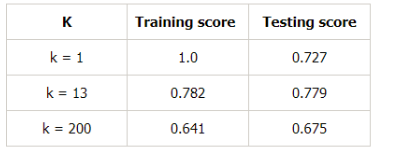

### Conclusion
To summarize, in this article, we learned that an ideal model would be one where both the bias error and the variance error are low. However, we should always aim for a model where the model score for the training data is as close as possible to the model score for the testing data.

That’s where we figured out how to choose a model that is not too complex (High variance and low bias) which would lead to overfitting and nor too simple(High Bias and low variance) which would lead to underfitting.

Bias and Variance plays an important role in deciding which predictive model to use. I hope this article explained the concept well.